In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models


In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train = X_train/255.0
X_test= X_test/255.0

In [ ]:
y_train = y_train.flatten()
y_test=y_test.flatten()

In [ ]:
model = models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(16,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 16)         

In [ ]:
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
H=model.fit(X_train,y_train,epochs=2,validation_data=(X_test,y_test))

Epoch 1/2
1563/1563 [==============================] - 49s 31ms/step - loss: 1.7199 - accuracy: 0.3638 - val_loss: 1.4234 - val_accuracy: 0.4788
Epoch 2/2
1563/1563 [==============================] - 47s 30ms/step - loss: 1.3971 - accuracy: 0.4955 - val_loss: 1.5334 - val_accuracy: 0.4622


In [ ]:
from sklearn.metrics import classification_report
p= model.predict(X_test)
print(classification_report(y_test,p.argmax(axis=1)))

313/313 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      1000
           1       0.77      0.50      0.61      1000
           2       0.35      0.36      0.36      1000
           3       0.26      0.34      0.30      1000
           4       0.47      0.38      0.42      1000
           5       0.31      0.70      0.43      1000
           6       0.78      0.23      0.35      1000
           7       0.51      0.66      0.57      1000
           8       0.74      0.42      0.54      1000
           9       0.64      0.46      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.54      0.46      0.47     10000
weighted avg       0.54      0.46      0.47     10000



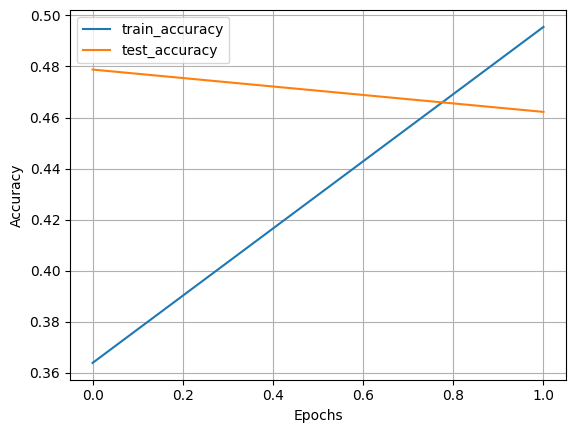

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(0,2),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,2),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()